<a href="https://colab.research.google.com/github/LeeKLTW/tf2/blob/master/W2Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

1.13.1


In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [43]:
print(x_train.shape)

(60000, 28, 28)


9


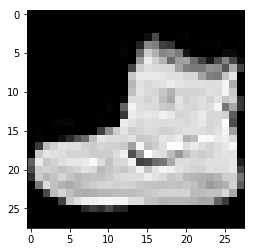

In [13]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='gray')
print(y_train[0])

In [0]:
x_train = x_train/255.
x_test = x_test/255.

In [0]:
model = keras.Sequential([keras.layers.Flatten(), 
                          keras.layers.Dense(128,activation=tf.nn.relu),
                         keras.layers.Dense(10,activation=tf.nn.softmax)])

model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.train.AdamOptimizer(),metrics=['accuracy'])

In [40]:
model.fit(x_train,y_train,epochs=5,callbacks=)

Epoch 1/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2797 - acc: 0.8960
Epoch 2/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2668 - acc: 0.8996
Epoch 3/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2586 - acc: 0.9033
Epoch 4/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2459 - acc: 0.9076
Epoch 5/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2385 - acc: 0.9106


In [41]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.3391 - acc: 0.8824


[0.33910266109704973, 0.8824]

Callback part

In [0]:
import tensorflow as tf
class ACCCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc')>0.8:
            print('\n Reach 80% accuracy, so early stop.')
            self.model.stop_training = True


In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train,x_test = x_train/255., x_test/255.

In [0]:
acc_callback =  ACCCallback()

In [0]:
model = keras.Sequential([keras.layers.Flatten(), 
                          keras.layers.Dense(128,activation=tf.nn.relu), 
                          keras.layers.Dense(10,activation='softmax')])
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.train.AdamOptimizer(),metrics=['accuracy'])

In [57]:
model.fit(x_train,y_train,epochs=10,callbacks=[acc_callback])

Epoch 1/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.4630 - acc: 0.8372
